In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction import stop_words
from sklearn.linear_model import logistic
from sklearn import svm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
def spam_or_not(s):
    if s == 'ham':
        return 0
    elif s == 'spam':
        return 1

In [3]:
df = pd.read_csv('spam.csv', encoding='latin1', usecols=[0, 1], names=['is spam', 'sms'], header=None)[1:]
df['is spam'] = df['is spam'].apply(spam_or_not)
df.head()
df.info()
df.groupby('is spam').describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 1 to 5572
Data columns (total 2 columns):
is spam    5572 non-null int64
sms        5572 non-null object
dtypes: int64(1), object(1)
memory usage: 87.1+ KB


sms                                                               
        count unique                                                top freq
is spam                                                                     
0        4825   4516                             Sorry, I'll call later   30
1         747    653  Please call our customer service representativ...    4

[]

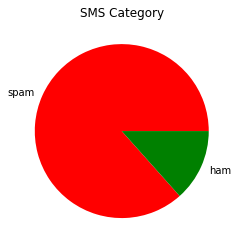

In [4]:
plt.title('SMS Category')
labels = ['spam', 'ham']
sizes = [4825, 747]
colors = ['r', 'g']
plt.pie(x=sizes, labels=labels, colors=colors)
plt.plot()

In [5]:
def p_digits(text):
    count = 0
    for i in text:
        if i.isdigit():
            count += 1
    return (count/ len(text))*100


df['p_digits'] = df['sms'].apply(p_digits)
df.head()

,is spam,sms,p_digits
1,0,"Go until jurong point, crazy.. Available only ...",0.000000
2,0,Ok lar... Joking wif u oni...,0.000000
3,1,Free entry in 2 a wkly comp to win FA Cup fina...,16.129032
4,0,U dun say so early hor... U c already then say...,0.000000
5,0,"Nah I don't think he goes to usf, he lives aro...",0.000000


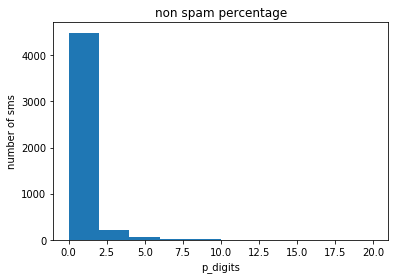

In [6]:
plt.hist(df[df['is spam'] == 0]['p_digits'], range=(0, 20), bins=10, rwidth=1)
plt.xlabel('p_digits')
plt.ylabel('number of sms')
plt.title('non spam percentage')
plt.show()

In [7]:
def p_ques_mark(text):
    count = 0
    for i in text:
        if i == '?':
            count +=1
    return (count/len(text)) * 100

df['p_ques_mark']=df['sms'].apply(p_ques_mark)
df.head()

,is spam,sms,p_digits,p_ques_mark
1,0,"Go until jurong point, crazy.. Available only ...",0.000000,0.0
2,0,Ok lar... Joking wif u oni...,0.000000,0.0
3,1,Free entry in 2 a wkly comp to win FA Cup fina...,16.129032,0.0
4,0,U dun say so early hor... U c already then say...,0.000000,0.0
5,0,"Nah I don't think he goes to usf, he lives aro...",0.000000,0.0


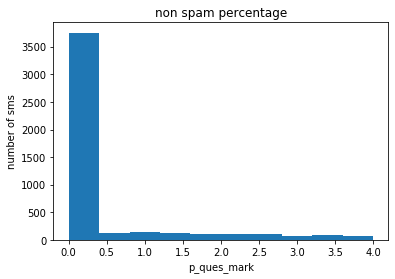

In [8]:
plt.hist(df[df['is spam'] == 0]['p_ques_mark'], range=(0, 4), bins=10, rwidth=1)
plt.xlabel('p_ques_mark')
plt.ylabel('number of sms')
plt.title('non spam percentage')
plt.show()

In [9]:
def p_excl_mark(text):
    count = 0
    for i in text:
        if i == '!':
            count += 1
    return (count / len(text)) * 100


df['p_excl_mark'] = df['sms'].apply(p_excl_mark)
df.head()

,is spam,sms,p_digits,p_ques_mark,p_excl_mark
1,0,"Go until jurong point, crazy.. Available only ...",0.000000,0.0,0.0
2,0,Ok lar... Joking wif u oni...,0.000000,0.0,0.0
3,1,Free entry in 2 a wkly comp to win FA Cup fina...,16.129032,0.0,0.0
4,0,U dun say so early hor... U c already then say...,0.000000,0.0,0.0
5,0,"Nah I don't think he goes to usf, he lives aro...",0.000000,0.0,0.0


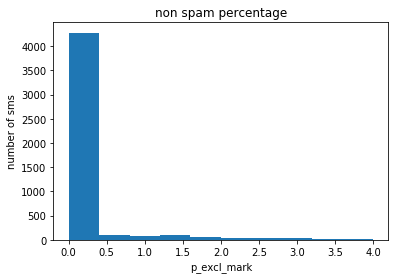

In [10]:
plt.hist(df[df['is spam'] == 0]['p_excl_mark'], range=(0, 4), bins=10, rwidth=1)
plt.xlabel('p_excl_mark')
plt.ylabel('number of sms')
plt.title('non spam percentage')
plt.show()

In [11]:
def p_caps(text):
    count = 0
    for i in text:
        if i.isupper():
            count += 1
    return (count / len(text)) * 100


df['p_caps'] = df['sms'].apply(p_caps)
df.head()

,is spam,sms,p_digits,p_ques_mark,p_excl_mark,p_caps
1,0,"Go until jurong point, crazy.. Available only ...",0.000000,0.0,0.0,2.702703
2,0,Ok lar... Joking wif u oni...,0.000000,0.0,0.0,6.896552
3,1,Free entry in 2 a wkly comp to win FA Cup fina...,16.129032,0.0,0.0,6.451613
4,0,U dun say so early hor... U c already then say...,0.000000,0.0,0.0,4.081633
5,0,"Nah I don't think he goes to usf, he lives aro...",0.000000,0.0,0.0,3.278689


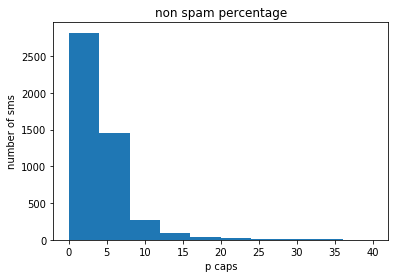

In [12]:
plt.hist(df[df['is spam'] == 0]['p_caps'], range=(0, 40), bins=10, rwidth=1)
plt.xlabel('p caps')
plt.ylabel('number of sms')
plt.title('non spam percentage')
plt.show()

In [13]:
df['length_of_sms']=df['sms'].apply(len)


In [14]:
def thanks(text):
  counter = 0
  for i in text:
    if i == 'win' or i=='award' or i=='free' or i=='thankyou' or i=='Won' or i=='credit' or i=='Win' or i=="Free" or i=='Thankyou':
      counter +=1
  return counter

df['thanks']=df['sms'].apply(thanks)

In [15]:
def isalpha(word):
    word = word.replace('.', '')
    return word.isalpha()

def clean_sms(text):
    text = text.lower()
    return (' '.join(filter(lambda s: isalpha(s) and s not in stopwords.words("english"), text.split()))).replace('.','').split()


In [16]:
import nltk
nltk.download('stopwords')
cv = CountVectorizer(strip_accents='ascii', min_df=1, analyzer=clean_sms)
df = pd.concat([df, pd.DataFrame(cv.fit_transform(df['sms']).todense(), columns=cv.get_feature_names(), index=np.arange(1, cv.fit_transform(df['sms']).todense().shape[0] + 1))], axis=1)

X = df.drop(['is spam', 'sms'], axis=1)
y = df['is spam']
#print(X, y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42)

clf = LogisticRegression()
print(clf)
clf = clf.fit(X_train, y_train)

y_actual = y_test
y_predicted = clf.predict(X_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
true_positives = X_test[(y_actual == 1) & (y_predicted == 1)]
true_negatives = X_test[(y_actual == 0) & (y_predicted == 0)]
false_positives = X_test[(y_actual == 0) & (y_predicted == 1)]
false_negatives = X_test[(y_actual == 1) & (y_predicted == 0)]

precision = true_positives.shape[0] / (true_positives.shape[0] + false_positives.shape[0])
print("Precision:", precision)
recall = true_positives.shape[0] / (true_positives.shape[0] + false_negatives.shape[0])
print("Recall:", recall)
f1_score = 2 * precision * recall / (precision + recall)
print("F1 score:", f1_score)
accuracy= (true_positives.shape[0]+true_negatives.shape[0])/(true_positives.shape[0]+true_negatives.shape[0]+false_positives.shape[0]+false_negatives.shape[0])
print("Accuracy score:", accuracy)

Precision: 0.9703703703703703
Recall: 0.9357142857142857
F1 score: 0.9527272727272726
Accuracy score: 0.9883408071748879
